# chap8. 자연어 처리 시작하기

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

- `konlpy`, `JPype1-py3`(JDK 설치 필요), `wordcloud`, `gensim`
- pip로 설치하면 됨.

```python
>>> import nltk
>>> nltk.download()
```

- All Packages -> stopwords, punkt 설치

## 8-2. 한글 자연어 처리 기초

- `KoNLPy`는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 해줌

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

- 꼬꼬마 모듈 사용

In [13]:
kkma.sentences('한국어 분석을 시작합니다 재미있어욤~~')

['한국어 분석을 시작합니다', '재미있어욤~~']

- 문장(sentences) 분석
- 마침표(`.`)가 없어도 두 개의 문장으로 구분

In [2]:
kkma.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석']

- 명사(nouns) 분석도 수행

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

- 형태소(pos) 분석도 수행
- 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근할 수 없음
- 최소한의 의미인 형태소로 언어를 분석하는 것이 일반적

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

- 한나눔 모듈 사용

In [6]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있어욤', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있어욤', 'N'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '욤']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '욤', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('욤', 'Noun'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

- 워드 클라우드(word cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알림

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

- 이상한 나라의 앨리스 영문 버전과 앨리스 그리을 저장
- 'said'라는 단어는 카운트에서 제거(너무 많이 나옴)

In [16]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system.')
    
%matplotlib inline

- matplotlib에서 한글 폰트 설정

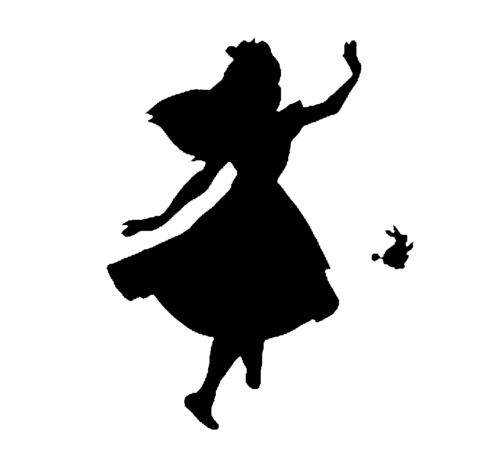

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- 문서 자체에서 단어를 카운트하는 기능을 사용해 최빈 단어를 찾음

In [18]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

- 결과를 앨리스 그림에 겹쳐 보이기

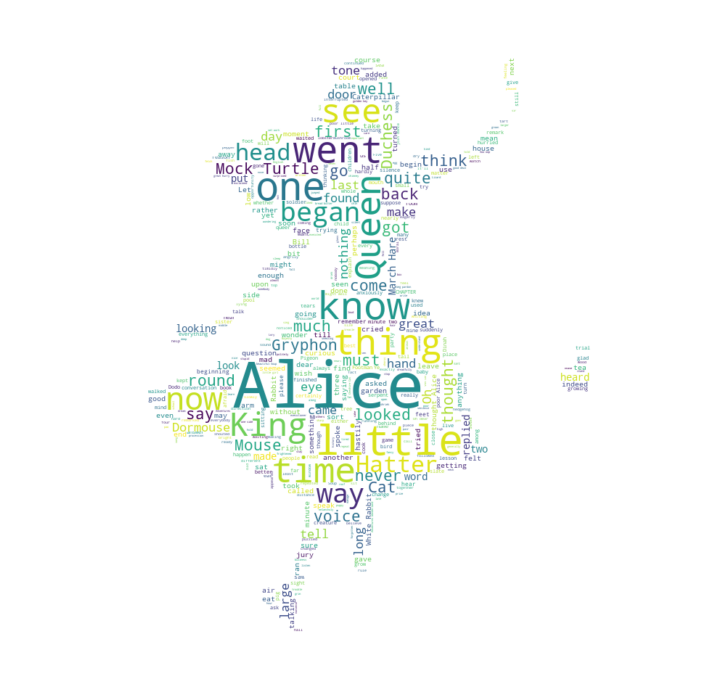

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 스타워즈의 A New Hope 텍스트로 실습

In [20]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

- 특수하게 처리해야 할 단어를 처리

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

- 워드 클라우드 준비

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

- 전체적으로 회색(grey)으로 채우도록 함수 생성

In [25]:
import random
def grey_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

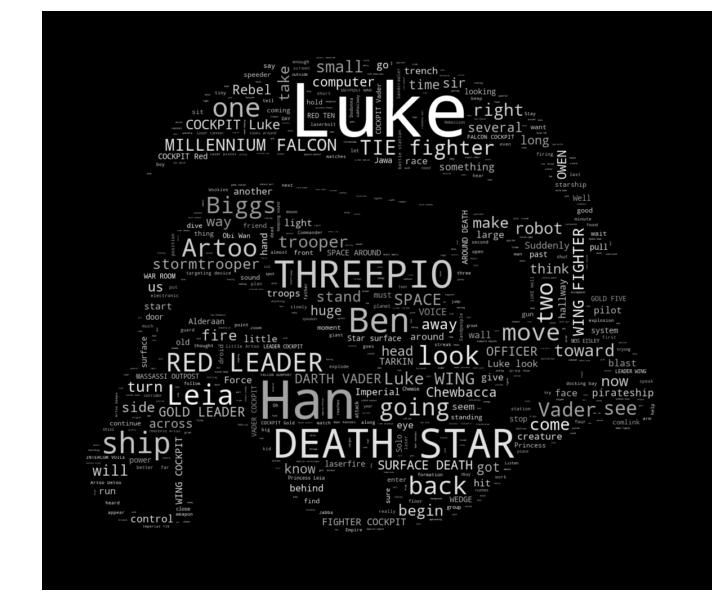

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직 관련 법안에 대한 분석

In [27]:
import nltk

In [28]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

- KoNLPy의 내부 문서 중 육아휴직 관련 법안 제 1809890호를 읽음
- 이 법률은 공무원에 한정되지만 육아휴직 대상이 되는 아이의 나이를 만 6세에서 만 8세로 확장하는 내용을 담고 있음

In [29]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

- Twitter 분석기로 명사를 분석

In [30]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


- 수집된 단어의 횟수와 고유횟수(set)를 확인

In [31]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [33]:
print(len(ko.tokens))  # return number of tokens(document length)
print(len(set(ko.tokens)))  # return number of unique tokens
ko.vocab  # return frequency distribution

735
258


<bound method Text.vocab of <Text: 대한민국 국회 의안 제 1809890호>>

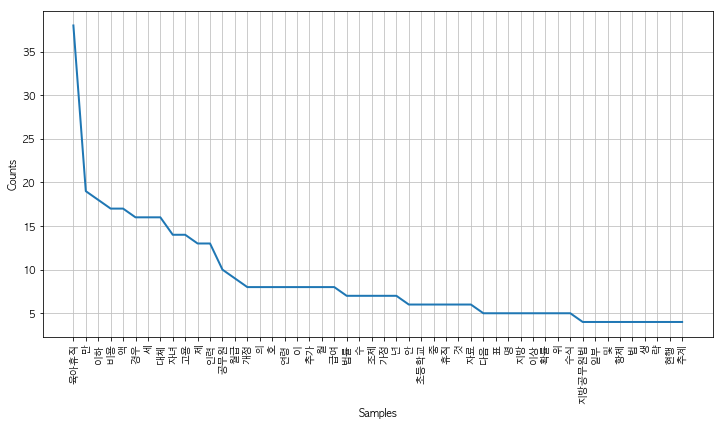

In [34]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

- 많이 등장한 순으로 plot
- 당연히 '육아휴직'이 가장 많이 등장
- 한글은 영어와 달리 stopwords를 지정하기 어려움 (의미 없는 단어도 등장)
- case by case로 지정

In [35]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

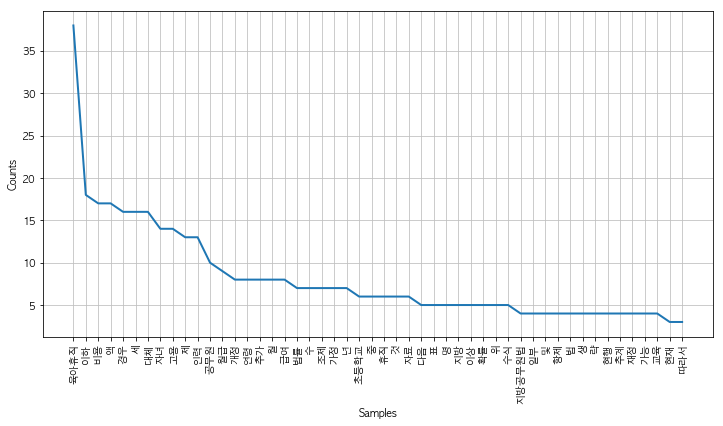

In [36]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)   # plot sorted frequency of top 50 tokens
plt.show()

In [37]:
ko.count('초등학교')

6

- 어떤 단어가 문서 내에서 몇 번 언급되는지 확인

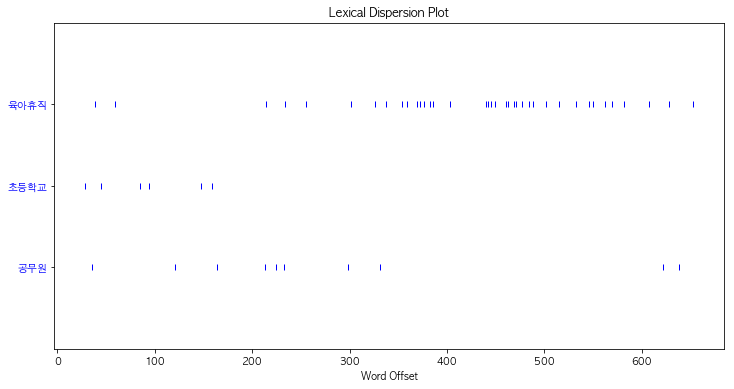

In [38]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

- 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있음

In [39]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 
 필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 
 개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부
 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 행
명 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행 


- 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있음

In [40]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


- 워드 클라우드 적용

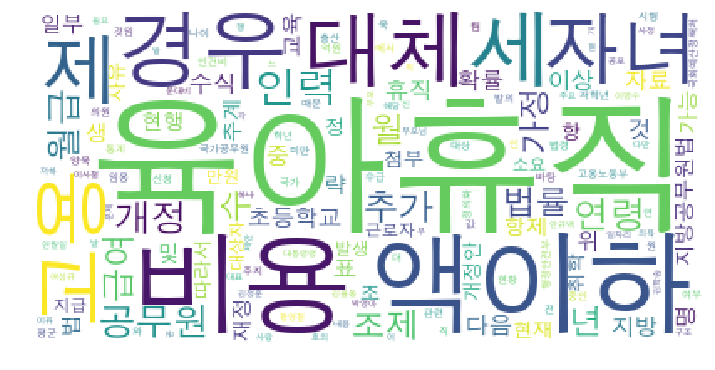

In [41]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 8-5. Naive Bayes Classifire의 이해 - 영문

In [42]:
from nltk.tokenize import word_tokenize
import nltk

In [43]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

- 연습용(train)데이터로 4개의 문자 입력

In [44]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

- train 문장에서 사용된 전체 단어를 찾음

In [45]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'me': False,
   'her': False,
   'i': True,
   'you': True,
   'hate': False,
   'like': True},
  'pos'),
 ({'me': False,
   'her': False,
   'i': True,
   'you': True,
   'hate': True,
   'like': False},
  'neg'),
 ({'me': True,
   'her': False,
   'i': False,
   'you': True,
   'hate': False,
   'like': True},
  'neg'),
 ({'me': False,
   'her': True,
   'i': True,
   'you': False,
   'hate': False,
   'like': True},
  'pos')]

- 위에서 찾은 단어들이 train 문장에 속한 단어인지 기록

In [46]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


- train 문장에 붙은 긍정/부정 태그를 이용해서 분류한 결과 'hate'라는 단어가 없을 때(False) 긍정일 비율이 1.7:1이라는 의미
- 'like'라는 단어는 3번 사용되었고, 그중 2개의 문자잉 긍정의 의미
- 그래서 'like'가 있을때(True) 긍정일 확율이 1.7:1

In [47]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'me': False,
 'her': False,
 'i': True,
 'you': False,
 'hate': False,
 'like': True}

- 다른 테스트 문장으로 분류기를 통과

In [48]:
classifier.classify(test_sent_features)

'pos'

- 'naive'하지만 잘 동작한다는 평가를 받는 것이 Naive Bayes Classifier